# Neural Networks Extended

<a id='Table_of_Content'></a>


*  **[1. Parameter Initialization](#1.Parameter_Initialization)**
 * [1.1. Weight Initialization](#1.1.WeightInitialization)
 * [1.1.1. All Zero Initialization](#1.1.1.All_Zero_Initialization)
 * [1.1.2. Small Random Number](#1.1.2.Small_Random_Number)
 * [1.1.3. Large Random Number](#1.1.3.Large_Random_Number)
 * [1.1.4. Xavier Initialization (Optimum Way)](#1.1.4.Xavier_Initialization)
 * [1.2. Bias Initialization](#1.2.Bias_Initialization)
 * [1.3. Data Pre-processing](#1.3.Data_Pre-processing)
 * [1.3.1. Overview](#1.3.1.Overview)
 * [1.3.2. Mean Subtraction](#1.3.2.Mean_Subtraction)
 * [1.3.3. Normalization](#1.3.3.Normalization)
* **[2. Activation Function](#2.Activation_Function)**
 * [2.1. Overview](#2.1.Overview)
 *  [2.2. Examples of activation functions](#2.2.Examples_of)
 *  [2.2.1. Sigmoid](#2.2.1.Sigmoid)
 *  [2.2.2. Tanh](#2.2.2.Tanh)
 *  [2.2.3. ReLU](#2.2.3.ReLU)
 *  [2.2.4. Leaky ReLU](#2.2.4.Leaky_ReLU)
 *  [2.2.5. Softmax](#2.2.5.Softmax)
 *  [2.2.5.1. Cross Entropy Loss (a.k.a log loss)](#2.2.5.1.Cross_Entropy_Loss)
* **[3. Batch Normalization](#3.Batch_Normalization)**
* **[4. Dropout Regularization](#4.Dropout_Regularization)**
 *  [4.1. Overview](#4.1.Overview)
* **[5. Optimization (Parameter Updates)](#5.Optimization)**
 *  [5.1. Stochastic Gradient Descent (SGD)](#5.1.Stochastic_Gradient_Descent)
 *  [5.2. SGD + Momentum](#5.2.SGD_Momentum)
 *  [5.3. SGD + Nesterov Momentum](#5.3.SGD_Nesterov_Momentum)
 *  [5.4. Adagrad](#5.4.Adagrad)
 *  [5.5. RMSProp](#5.5.RMSProp)
 *  [5.6. Adaptive Moment Estimation (Adam)](#5.6.Adam)
* **[6. CIFAR-10 dataset](#6.Use_Case)**

<a id='1.Parameter_Initialization'></a>
# 1. Parameter Initialization

Parameter initialization is a very important step in getting neural networks to start. Without a careful initialization, the neural networks may slow to converge or not converge at all.

<a id='1.1.WeightInitialization'></a>

## 1.1. Weight Initialization

There are few scenarios of weight initialization:

<a id='1.1.1.All_Zero_Initialization'></a>
### 1.1.1. All Zero Initialization

- If all the initial weights are set to zero, every neuron computes the same output, ends up computing the same gradients during backpropagation and performing the same parameter updates. This is just equivalent to a linear model. Hence, it is generally a **bad idea**.


<a id='1.1.2.Small_Random_Number'></a>
### 1.1.2. Small Random Number

- Initializing weights with small random numbers works for simple Neural Network, i.e. $\leq 5$ hidden layers but not for deeper Neural Network.

- This is because the gradient will get smaller and smaller during the backward pass. If we have deeper network with small weight initialized, the "gradient signal" would eventually vanish during the backward pass through a network in deep networks (e.g. $>5$ hidden layers). When the gradient is close to zero means the weight update is minor and lead to slower convergence. In the worst case, this may cause the neural network to stop learning. This is known as **vanishing gradients**.

<a id='1.1.3.Large_Random_Number'></a>
### 1.1.3. Large Random Number


- When the large weights are multiplied along the layers, they cause a large change in cost. As a consequence, the gradients computed from these weights would be large, and the updates taken would be in huge steps. This may lead to the oscillation around the global minima or even overshooting the global minima again and again. As a result, the neural network might never converge. This is known as **exploding gradients**.

<a id='1.1.4.Xavier_Initialization'></a>
### 1.1.4. Xavier Initialization (Optimum Way)

- In short, Xavier initialization makes sure the weights are ‘just right’, keeping the signal in a reasonable range of values through many layers.

- Xavier initialization initializes the weights by suggesting that the variance of the Gaussian distribution of weights for each layer should depend on the number of input features to the layer. Commonly the variance of every weight would be:


$$ Var(W)=\frac{1}{n_{in}}$$

- To get the variance of the gaussian distributed weight to shift from $1$ to $\frac{1}{n_{in}}$, what we do is to multiply gaussian distributed weight with $\sqrt\frac{1}{n_{in}}$.

- Recently, there is derivative of Xavier Initialization specifically for ReLU activation function:

$$ Var(W)=\frac{2}{n_{in}}$$

- The mathematical notation above doubles the size of weight variance to keep the variance constant as ReLU is zero for half of its input. This Xavier Initialization is recommended to use in practice when the neural network is dealing with ReLU neurons.



In [1]:
# Import libraries

import numpy as np
import matplotlib.pyplot as plt


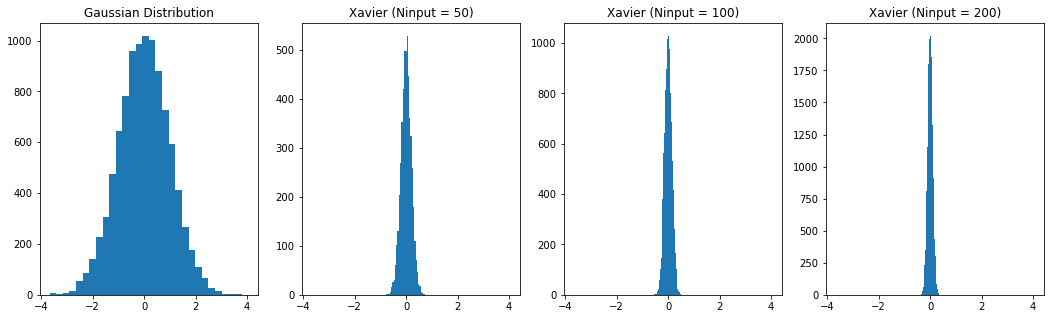

In [2]:
# N_in is number of input features
# N_out is number of output features

def Xavier_initialization(N_in, N_out):
    return np.random.randn(N_in, N_out).astype(np.float32) * np.sqrt(2.0/(N_in))

W_gausian = np.random.randn(100,100)
W_xavier_1 = Xavier_initialization(50,100)
W_xavier_2 = Xavier_initialization(100,100)
W_xavier_3 = Xavier_initialization(200,100)

fig, axs = plt.subplots(1, 4, sharex=True,figsize=(18,5))

axs[0].hist(W_gausian.reshape(-1), bins=30)
axs[0].set_title("Gaussian Distribution")
axs[1].hist(W_xavier_1.reshape(-1), bins=30)
axs[1].set_title("Xavier (Ninput = 50)")
axs[2].hist(W_xavier_2.reshape(-1), bins=30)
axs[2].set_title("Xavier (Ninput = 100)")
axs[3].hist(W_xavier_3.reshape(-1), bins=30)
axs[3].set_title("Xavier (Ninput = 200)")
plt.show()

<a id='1.2.Bias_Initialization'></a>

## 1.2. Bias Initialization
On the other hand, it is a comman practice to initialize the biases to be zero.

<a id='1.3.Data_Pre-processing'></a>

## 1.3. Data Pre-processing

<a id='1.3.1.Overview'></a>
### 1.3.1. Overview

Data pre-processing allows the loss function of a neural network being robust to the small pertubations in the parameter vectors (e.g. weight matrix), and thus help to smoothen the optimization process.

There are two popular pre-processing techniques in neural network, which are listed below:

<a id='1.3.2.Mean_Subtraction'></a>
### 1.3.2. Mean Subtraction

- The most common form of data pre-processing. 
- The mean is subtracted across every individual feature in the data. By doing so, the data could be centered around the origin along every dimension.
- For numeric data, the mean could be computed by:  ``X_mean = np.mean(X, axis = 0)``. 
-  For image data, the mean could be computed by: ``X_mean = np.mean(X)``, with the meaning that subtracting a single value from all pixels.


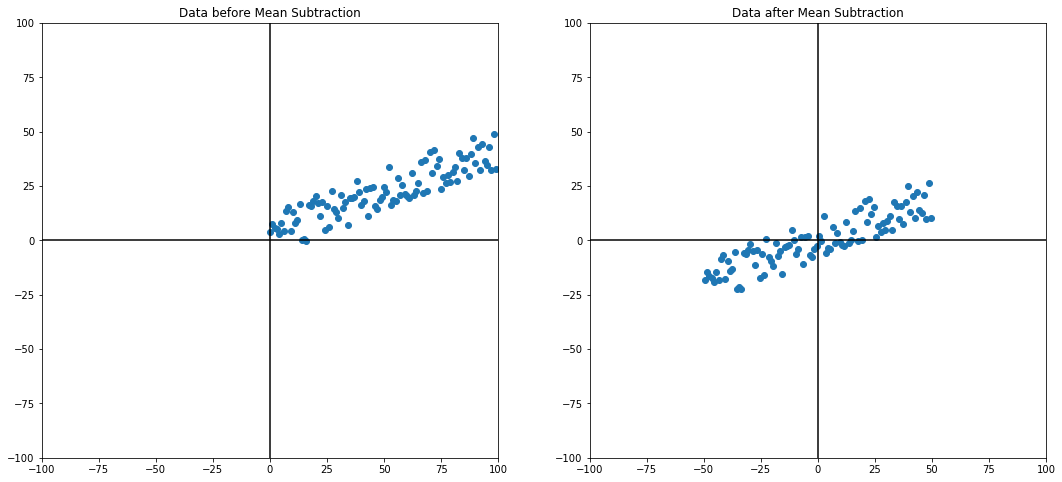

In [3]:
f,ax = plt.subplots(1,2,figsize=(18,8))

def gen_data(n=100):
    X = np.arange(100)
    delta = np.random.uniform(-10,10, size=(100,))
    Y = .4 * X +3 + delta
    return X,Y

np.random.seed(0)
X, Y = gen_data(100)

ax[0].scatter(X,Y)
ax[0].axhline(0, color='black')
ax[0].axvline(0, color='black')
ax[0].set_title("Data before Mean Subtraction")
ax[0].set_ylim(-100,100)
ax[0].set_xlim(-100,100)


X_mean = np.mean(X,axis=0)
X = X-X_mean
Y_mean = np.mean(Y,axis=0)
Y = Y-Y_mean
ax[1].scatter(X,Y)
ax[1].axhline(0, color='black')
ax[1].axvline(0, color='black')
ax[1].set_title("Data after Mean Subtraction")
ax[1].set_ylim(-100,100)
ax[1].set_xlim(-100,100)

plt.show()

<a id='1.3.3.Normalization'></a>
### 1.3.3. Normalization
- A way used to reconstruct the data so that they are of approximately the same scale.
- Two common methods to normalize the data:
 - **Method 1:** After the data has been zero-centered (i.e. after performing mean subtraction), each dimension of the data is divided by its standard deviation. The standard deviation could be obtained through: `X_std =  np.std(X, axis = 0)`.
 - **Method 2:** The min and max along the dimensions are reconstructed so that they are within certain range. For example:
    - Set the range between -1 to 1 to obtain a zero-centered data.
    - Set the range between 0 to 1 if zero-centered is not a concern.
- Normalization is performed only when the input features have different scales and this is common in numeric data. For image data, the pixels have approximately same scale, hence this step is not necessary.

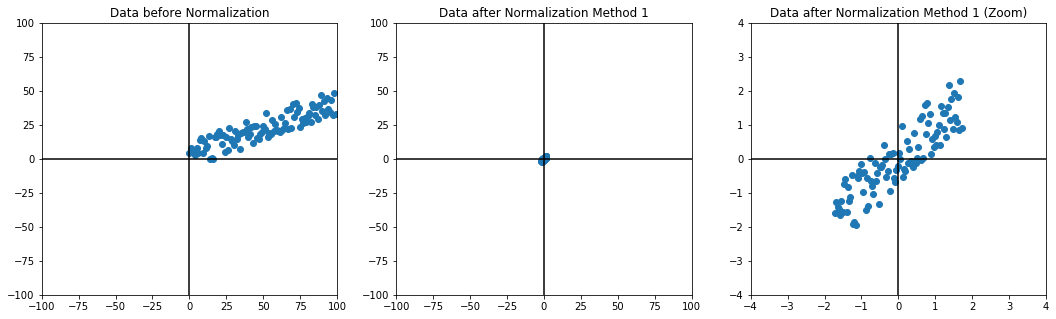

In [4]:
f,ax = plt.subplots(1,3,figsize=(18,5))

np.random.seed(0)
X, Y = gen_data(100)

ax[0].scatter(X,Y)
ax[0].axhline(0, color='black')
ax[0].axvline(0, color='black')
ax[0].set_title("Data before Normalization")
ax[0].set_ylim(-100,100)
ax[0].set_xlim(-100,100)

X_mean = np.mean(X,axis=0)
X_std = np.std(X, axis = 0)
X = (X-X_mean)/X_std

Y_mean = np.mean(Y,axis=0)
Y_std = np.std(Y, axis = 0)
Y = (Y-Y_mean)/Y_std

ax[1].scatter(X,Y)
ax[1].axhline(0, color='black')
ax[1].axvline(0, color='black')
ax[1].set_ylim(-100,100)
ax[1].set_xlim(-100,100)
ax[1].set_title("Data after Normalization Method 1")

ax[2].scatter(X,Y)
ax[2].axhline(0, color='black')
ax[2].axvline(0, color='black')
ax[2].set_ylim(-4,4)
ax[2].set_xlim(-4,4)
ax[2].set_title("Data after Normalization Method 1 (Zoom)")


plt.show()

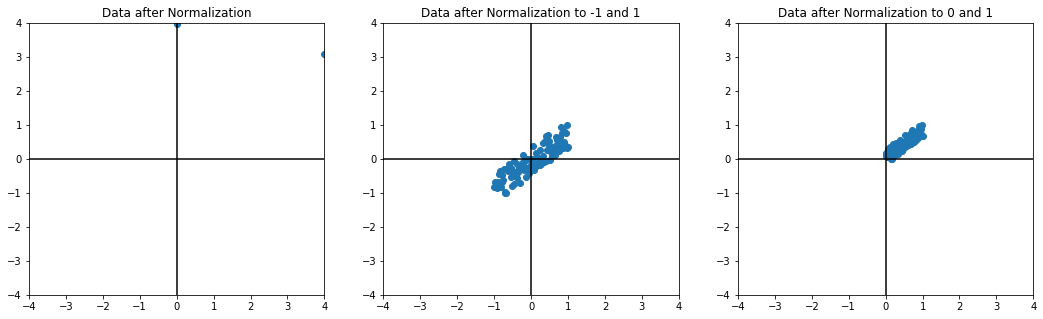

In [5]:
f,ax = plt.subplots(1,3,figsize=(18,5))

def in_range(X,Y,rng):
    min_, max_ = rng
    min_v = min_
    max_v = max_
    X_new= (max_v-min_v)/(np.max(X)-np.min(X))*(X-np.max(X))+max_v
    Y_new= (max_v-min_v)/(np.max(Y)-np.min(Y))*(Y-np.max(Y))+max_v
    return X_new, Y_new

np.random.seed(0)
X, Y = gen_data(100)

ax[0].scatter(X,Y)
ax[0].axhline(0, color='black')
ax[0].axvline(0, color='black')
ax[0].set_ylim(-4,4)
ax[0].set_xlim(-4,4)
ax[0].set_title("Data after Normalization")

# in range -1 to 1
X_new, Y_new = in_range(X,Y,[-1,1])

ax[1].scatter(X_new,Y_new)
ax[1].axhline(0, color='black')
ax[1].axvline(0, color='black')
ax[1].set_ylim(-4,4)
ax[1].set_xlim(-4,4)
ax[1].set_title("Data after Normalization to -1 and 1")

# in range 0 to 1
X_new, Y_new = in_range(X,Y,[0,1])

ax[2].scatter(X_new,Y_new)
ax[2].axhline(0, color='black')
ax[2].axvline(0, color='black')
ax[2].set_ylim(-4,4)
ax[2].set_xlim(-4,4)
ax[2].set_title("Data after Normalization to 0 and 1")

plt.show()

Click here to go back [Table of Content](#Table_of_Content).

<a id='2.Activation_Function'></a>

# 2. Activation Function

<a id='2.1.Overview'></a>
## 2.1. Overview

Activation function is the important element in neural network. The activation function provides non-linear transformation over the input signal.

$$Y=Activation(\sum(weight*input)+bias)$$

### Can we do neural networks without an activation function?

Without an activation function, the weights and bias would just perform simple linear transformation, and hence introduce the limitations to solve the complex problems. In shorts, without an activation function, neural network is essentially just a linear regression model. 

<a id='2.2.Examples_of'></a>
## 2.2. Examples of activation functions

<a id='2.2.1.Sigmoid'></a>
### 2.2.1. Sigmoid
$$sigmoid(x)=\frac{1}{(1+e^{-x})}$$


- Sigmoid receives a number and “squashes” it into range [0,1].
- Sigmoid turns large negative numbers to near to 0 and and large positive numbers to near to 1.
- Less popular nowadays.

<img src="images/Sigmoid_function.png" width='400px'>

**Disadvantage:**

- Sigmoid would saturate and kill gradients.

    - Sigmoid function causes the neuron's activation saturates when it comes to the tail of 0 or 1, resulting the gradient to be almost zero. This incurs problem in backpropagation, where this (local) gradient will be multiplied with upstream gradient. If the local gradient is almost zero, the result of backpropagation in this neuron will be almost zero as well, and thus no signal will flow through the neuron to its weights and data.
    

- Outputs of sigmoid are not zero-centered.

    - When the output is not zero-centered, the input receiving by next neuron is not zero-centered as well. Again, this leads to an issue in backpropagation. If the input is always positive, then the gradients on the weights will become either all positive, or all negative, introducing undesirable zig-zagging dynamics during gradient updates for the weights.

In [6]:
def sigmoid(x):
    return (1 / (1 + np.exp(-x)))
  
#gradient of sigmoid
def d_sigmoid(x):
    return (sigmoid(x) * (1-sigmoid(x)))

#assume z=x*w+b
np.random.seed(0)
z_large = np.random.rand(2,3) * 5
print('z value :')
print(z_large)

a_large = sigmoid(z_large)
print('activated :')
print(a_large)

#gradient of a_large
d_a_large = d_sigmoid(z_large)
print('gradient :')
print(d_a_large)

z value :
[[2.74406752 3.57594683 3.01381688]
 [2.72441591 2.118274   3.22947057]]
activated :
[[0.93957743 0.97277314 0.95319444]
 [0.93845209 0.89266667 0.96192837]]
gradient :
[[0.05677168 0.02648556 0.0446148 ]
 [0.05775976 0.09581289 0.03662218]]


<a id='2.2.2.Tanh'></a>
### 2.2.2. Tanh

$$tanh(x)=\frac{2}{(1+e^{-2x})} -1$$

- Tanh is a scaled version of sigmoid function with symmetric over the origin and range between [-1,1]. Except for this, Tanh carries the same properties as Sigmoid function.

<img src="images/Tanh_function.png" width='400px'>

** Advantage: **

- Outputs of tanh are zero-centered.

    - So the gradients of weights would not to be of the same sign. 
    
** Disadvantage: **
- Tanh would saturate and kill gradients, same with sigmoid.

In [7]:
def tanh(x):
    return (2 / (1 + np.exp(-(2*x)))-1)

def d_tanh(x):
    return (1-(tanh(x)**2))

#assume z=x*w+b
np.random.seed(1)
z_large = np.random.randn(2,3) * 5
print('z value :')
print(z_large)

a_large = tanh(z_large)
print('activated :')
print(a_large)

#gradient of a_large
d_a_large = d_tanh(z_large)
print('gradient :')
print(d_a_large)

z value :
[[  8.12172682  -3.05878207  -2.64085876]
 [ -5.36484311   4.32703815 -11.50769348]]
activated :
[[ 0.99999982 -0.99560206 -0.98988404]
 [-0.99995623  0.99965123 -1.        ]]
gradient :
[[3.52872353e-07 8.77654409e-03 2.01295823e-02]
 [8.75381700e-05 6.97414432e-04 4.04207556e-10]]


<a id='2.2.3.ReLU'></a>
### 2.2.3. ReLU

Rectified Linear Unit

$$ReLU=max(0,x)$$

ReLU allows all positive values pass through unchanged, but defines 0 from any negative values.

<img src="images/ReLU_function.png" width='400px'>

**Advantage:**

- Simplicity and efficiency.
    - ReLU has linear, non-saturating form. Hence, it is faster during the convergence of gradient descent.
- Relatively robust to the vanishing/exploding gradient issue.

**Disadvantage:** 

- The gradient of negative side of the graph is still zero.
    - The weights in this region are not updated during backpropagation. Hence, dead neurons which never get activated would be created. 

In [8]:
def ReLU(x):
    return x * (x > 0)

def d_ReLU(x):
    return 1. * (x > 0)
  
#assume z=x*w+b
np.random.seed(1)
z_large = np.random.randn(2,3) * 5
print('z value :')
print(z_large)

a_large = ReLU(z_large)
print('activated :')
print(a_large)

#gradient of a_large
d_a_large = d_ReLU(z_large)
print('gradient :')
print(d_a_large)

z value :
[[  8.12172682  -3.05878207  -2.64085876]
 [ -5.36484311   4.32703815 -11.50769348]]
activated :
[[ 8.12172682 -0.         -0.        ]
 [-0.          4.32703815 -0.        ]]
gradient :
[[1. 0. 0.]
 [0. 1. 0.]]


<a id='2.2.4.Leaky_ReLU'></a>

### 2.2.4. Leaky ReLU

$$ Leaky ReLU = 
\begin{cases}
  ax & \text{x<0}  
  \\x & \text{x$\geq$ 0}
\end{cases}$$

- Leaky ReLU is an improved version of the ReLU, where it solves the disadvantage of ReLU. Instead of assigning zero to negative values, it defines a small linear component of x (i.e. ax). 

- By doing so, the horizontal line of negative side from ReLU could be replaced with a non-zero, non-horizontal line.

<img src="images/Leaky_ReLU_function.png" width='400px'>

**Advantage:**

- Zero gradient has been removed.
- Relatively robust to the vanishing/exploding gradient issue.

In [9]:
def leaky_relu(x, alpha=0.01):
    return np.where(x >= 0, x, x * alpha)

# x input of d_leaky_relu is the output of leaky_relu
def d_leaky_relu(x, alpha=0.01):
    return np.where(x >= 0, 1, alpha)


#assume z=x*w+b
np.random.seed(1)
z_large = np.random.randn(2,3) * 5
print('z value :')
print(z_large)

a_large = leaky_relu(z_large)
print('activated :')
print(a_large)

#gradient of a_large
d_a_large = d_leaky_relu(a_large)
print('gradient :')
print(d_a_large)

z value :
[[  8.12172682  -3.05878207  -2.64085876]
 [ -5.36484311   4.32703815 -11.50769348]]
activated :
[[ 8.12172682 -0.03058782 -0.02640859]
 [-0.05364843  4.32703815 -0.11507693]]
gradient :
[[1.   0.01 0.01]
 [0.01 1.   0.01]]


<a id='2.2.5.Softmax'></a>

### 2.2.5. Softmax


$$P(z_i) = \frac{e^{z_i}}{\sum_{n=1}^{N}e^{z_n}} \quad for \ i = 1,...,N$$

where, 
- $z_{i}$ = $i$th element of $z$ and $z$ is the scores
- $\sum_{n=1}^{N}e^{z_n}$ = summation of all the exponential element of $z$

### In classification task, why softmax classifier would be used as output layer of Neural Network?

For Neural Network in the classification tasks, the dimension of output layer depends on number of classes it copes with. For instances, there are 10 different classes in MNIST digit recognition task, hence the dimension of output layer would be 10. Ideally, the perfect neural network would assign probability of 1.0 for a single output node, and assign 0.0 to the rest of the output nodes.  

In order to do so, Max mechanism, which will provide probability of 1.0 for maximum output of previous layer and consider the probability of rest of output nodes as 0.0, should be adopted as the output layer of Neural Network. However, such output layer will not be differentiable, hence resulting difficulty in training the Neural Network.

To solve this issue, Softmax function has been used as the output layer because it works almost similar as Max mechanism and at them same time, it could be differentiable to train by gradient descent.

In [10]:
def softmax(x):
    e_x = np.exp(x - np.max(x)) #For numerical stability
    return e_x / e_x.sum(axis=0)

scores = [2.0, 1.0, 0.2]

print('softmax :')
print(softmax(scores))

softmax :
[0.65223985 0.23994563 0.10781452]


<a id='2.2.5.1.Cross_Entropy_Loss'></a>


### 2.2.5.1. Cross Entropy Loss (a.k.a log loss)

Softmax function is always in paired with cross entropy loss, to measure the distance between probability of the predicted class with the probability of the actual class. Cross entropy loss ranges **[0,$+\infty$]** and it increases when the predicted probability diverges from the actual class. A perfect model could have a cross entropy loss of 0. 


$$L(y,ŷ )=−\sum_{i=1}^{M}y_ilogŷ_i$$

where


- $M$ = number of classes
- $log$ = the natural log
- $y$ = actual class
- $ŷ$ = predicted probability 

Furthermore, with integration with Softmax, we can redefine $L$ as:

\begin{align*}
L =& −log(\frac{e^{z_y}}{\sum_{n=1}^{N}e^{z_n}}) \\
=& -z_y+log \sum_{n=1}^{N}e^{z_n}
\end{align*}



where 
- $z$ = scores
- $y$ = index of the actual class

<img src="images/softmax.png" width='300px'>

In [11]:
def softmax_entropy_loss(X, W, y):
    loss = 0.0
    dW = np.zeros_like(W)

    z = X.dot(W)
    z -= np.matrix(np.max(z, axis=1)).T # for numerical stability

    # number of sample
    N = z.shape[0]

    term1 = -z[np.arange(N), y]
    sum_exp_n = np.sum(np.exp(z), axis=1)
    term2 = np.log(sum_exp_n)
    loss = term1 + term2
    loss = np.sum(loss) / N

    # gradient of softmax entropy loss 
    coef = np.exp(z) / np.matrix(sum_exp_n).T
    coef[np.arange(N),y] -= 1
    
    # gradient of weight
    dW = X.T.dot(coef)
    dW /= N


    return(loss, dW)

z = np.array([
    [2.0, 1.0, 0.2],
    [1.0, 2.0, 0.5]
])

X = np.random.rand(2,3)
W = np.random.rand(3,3)

y = np.array([
    [0,1]
])

loss, grad=softmax_entropy_loss(X, W, y)
print(loss)

1.1940535372192058


Click here to go back [Table of Content](#Table_of_Content).

<a id='3.Batch_Normalization'></a>

# 3. Batch Normalization

Batch normalization can be explained as doing data normalization at every layer of the network. Batch normalization layer is usually inserted immediately after fully connected layers (or convolutional layers), and before non-linearlity layers. In general, batch normalization is a step used to minimize the internal covariate shift by fixing the means and variances of layer inputs. 

** Advantage: **

- The training of deep neural networks could be accelerated.
- Batch normalization reduces the dependence of gradients on their inital values as well as the scale of the parameters, hence allowing higher learning rates to be used without the risk of divergence. 
- Batch normalization helps in regularizing the model and thus decreases the need for dropout.

*Extra: 
It is known as Batch Normalization because we perform the normalization only for a subset of the entire training set (i.e. a mini batch).*


<img src="images/batch_normalization.png" width="500">

The last line of algorithm indicates that the normalized $x$ is squashed through a linear function with parameters $\gamma$ and $\beta$. These two parameters are trainable parameters with the purpose of transforming (scale and shift) the normalized $x$ into a better distribution, instead of fixing them into the normal Gaussian distribution.

On the other hand, if $\gamma = \sqrt{\sigma^2_x}$ and $\beta = \bar{x}$ , the original raw input $x$ would be returned. Hence, it allows the flexibility for us to retrieve back the original representation of $x$.

In [12]:
def batchnorm_forward(X, gamma, beta):
    
    # compute the mini-batch mean
    x_mu = np.mean(X, axis=0)
    
    # compute the mini-batch variance
    x_var = np.var(X, axis=0)
    
    # create epsilon variable
    epsilon = 1e-8
    
    # create inverse variance
    inv_var = 1/np.sqrt(x_var + epsilon)

    # normalize X to create x_hat
    x_hat = (X - x_mu) * inv_var
    
    # scale and shift
    out = gamma * x_hat + beta

    # for the use of backward propagation
    cache = (x_mu, inv_var, x_hat, gamma)

    return out, cache, x_mu, x_var
  
def batchnorm_backward(dout, cache):

    N, D = dout.shape
    x_mu, inv_var, x_hat, gamma = cache

    dxhat = dout * gamma

    dx = (1. / N) * inv_var * (N*dxhat - np.sum(dxhat, axis=0) - x_hat*np.sum(dxhat*x_hat, axis=0))
    dbeta = np.sum(dout, axis=0)
    dgamma = np.sum(x_hat*dout, axis=0)

    return dx, dgamma, dbeta

In [13]:
def gradient_check(f, x, df, h=1e-5):
    grad = np.zeros_like(x)
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        ix = it.multi_index
    
        oldval = x[ix]
        x[ix] = oldval + h
        pos = f(x).copy()
        x[ix] = oldval - h
        neg = f(x).copy()
        x[ix] = oldval
    
        grad[ix] = np.sum((pos - neg) * df) / (2 * h)
        it.iternext()
    return grad

def rel_error(x, y):
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

In [14]:
# Gradient check batchnorm backward pass

N, D = 4, 5
x = 5 * np.random.randn(N, D) + 12
gamma = np.random.randn(D)
beta = np.random.randn(D)
dout = np.random.randn(N, D)

fx = lambda x: batchnorm_forward(x, gamma, beta)[0]
fg = lambda g: batchnorm_forward(x, g, beta)[0]
fb = lambda b: batchnorm_forward(x, gamma, b)[0]

dx_num = gradient_check(fx, x, dout)
da_num = gradient_check(fg, gamma, dout)
db_num = gradient_check(fb, beta, dout)

_, cache, _, _ = batchnorm_forward(x, gamma, beta)
dx, dgamma, dbeta = batchnorm_backward(dout, cache)
print ('dx error: ', rel_error(dx_num, dx))
print ('dgamma error: ', rel_error(da_num, dgamma))
print ('dbeta error: ', rel_error(db_num, dbeta))

dx error:  7.851664442011559e-10
dgamma error:  1.0927281909015325e-11
dbeta error:  7.151756544846452e-11


Text(0.5, 1.0, 'Normalized ReLu Activation Distribution (gamma=1, beta=2)')

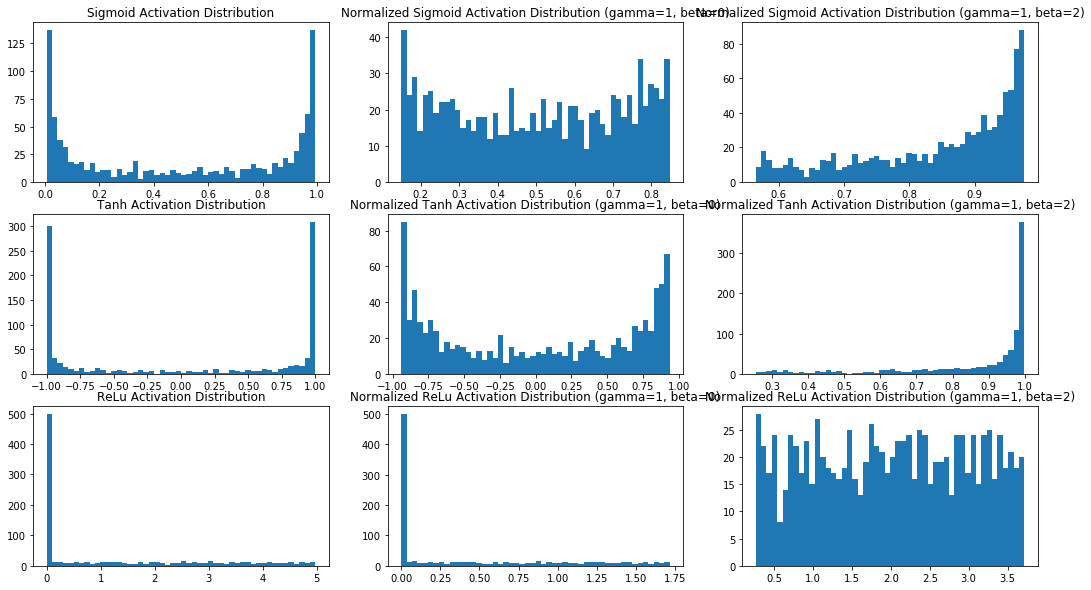

In [15]:
z = np.random.uniform(-5,5,1000)
z_sigmoid = sigmoid(z)
z_tanh = tanh(z)
z_relu = ReLU(z)

gamma = 1
beta = 0

#normalize z scores
output, cache, mu, var = batchnorm_forward(z, gamma, beta)

nz_sigmoid = sigmoid(output)
nz_tanh = tanh(output)
nz_relu = ReLU(output)

fig, axs = plt.subplots(3, 3, sharex=False,figsize=(18,10))

axs[0,0].hist(z_sigmoid, bins=50)
axs[0,0].set_title("Sigmoid Activation Distribution")
axs[1,0].hist(z_tanh, bins=50)
axs[1,0].set_title("Tanh Activation Distribution")
axs[2,0].hist(z_relu, bins=50)
axs[2,0].set_title("ReLu Activation Distribution")

axs[0,1].hist(nz_sigmoid, bins=50)
axs[0,1].set_title("Normalized Sigmoid Activation Distribution (gamma=1, beta=0)")
axs[1,1].hist(nz_tanh, bins=50)
axs[1,1].set_title("Normalized Tanh Activation Distribution (gamma=1, beta=0)")
axs[2,1].hist(nz_relu, bins=50)
axs[2,1].set_title("Normalized ReLu Activation Distribution (gamma=1, beta=0)")

gamma = 1
beta = 2
output2, cache, mu, var = batchnorm_forward(z, gamma, beta)
nz_sigmoid2 = sigmoid(output2)
nz_tanh2 = tanh(output2)
nz_relu2 = ReLU(output2)
axs[0,2].hist(nz_sigmoid2, bins=50)
axs[0,2].set_title("Normalized Sigmoid Activation Distribution (gamma=1, beta=2)")
axs[1,2].hist(nz_tanh2, bins=50)
axs[1,2].set_title("Normalized Tanh Activation Distribution (gamma=1, beta=2)")
axs[2,2].hist(nz_relu2, bins=50)
axs[2,2].set_title("Normalized ReLu Activation Distribution (gamma=1, beta=2)")

Click here to go back [Table of Content](#Table_of_Content).

<a id='4.Dropout_Regularization'></a>

#  4. Dropout Regularization

<a id='4.1.Overview'></a>

## 4.1. Overview

Overfitting occurs when the neural network does not generalize well from the training data to unseen data.

Generally, overfitting is the scenario when the neural network is able to achieve 99% accuracy on the original dataset (i.e. training accuracy) but only able to achieve 50% accuracy on unseen data (i.e. validation accuracy).

In neural networks, a fully connected layer consists of many parameters, and these neurons would develop co-dependency amongst each other, leading to overfitting issue. Thus, in order to reduce the interdependent learning amoungst the neurons, dropout technique is Introduced. Basically, dropout works by removing some neurons (by setting it to zero) during the training phase with some probability $p$ (hyperparameter).

<img src="images/dropout.png" width="500">

- **Training Phase:**

 - Drop a random fraction of nodes with the probability of $p$ (and their respective activations) as well as scaling with the probability of $p$ for each hidden layer, each training sample as well as each iteration.

- **Testing Phase:**

 - The neurons remain untouched.

In [16]:
def dropout_forward(X, params):
    p, mode = params['p'], params['mode']
    mask = None
    out = None

    if mode == 'train':
        mask = (np.random.rand(*x.shape) < p) / p #inverted dropout
        out = X * mask

    elif mode == 'test':
        mask = None
        out = X

    cache = (params, mask)
    out = out.astype(x.dtype, copy=False)

    return out, cache


def dropout_backward(dout, cache):
    params, mask = cache
    mode = params['mode']

    dx = None
    if mode == 'train':
        dx = dout * mask

    elif mode == 'test':
        dx = dout
    return dx

In [17]:
np.random.seed(0)
x = np.random.randn(5,5)
params ={
    'p': 0.5,
    'mode': 'train'
}
print(x)
print("")

output = dropout_forward(x, params)[0]
print("After Dropout: ")
print(output)

[[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799]
 [-0.97727788  0.95008842 -0.15135721 -0.10321885  0.4105985 ]
 [ 0.14404357  1.45427351  0.76103773  0.12167502  0.44386323]
 [ 0.33367433  1.49407907 -0.20515826  0.3130677  -0.85409574]
 [-2.55298982  0.6536186   0.8644362  -0.74216502  2.26975462]]

After Dropout: 
[[ 3.52810469  0.          0.          0.          0.        ]
 [-0.          1.90017684 -0.30271442 -0.          0.821197  ]
 [ 0.          0.          1.52207545  0.24335003  0.88772647]
 [ 0.66734865  0.         -0.41031653  0.         -1.70819148]
 [-5.10597963  1.30723719  0.         -1.48433004  4.53950925]]


Click here to go back [Table of Content](#Table_of_Content).

<a id='5.Optimization'></a>

# 5. Optimization (Parameter Updates)


<a id='5.1.Stochastic_Gradient_Descent'></a>
## 5.1. Stochastic Gradient Descent (SGD)

The process is similar to gradient descent. However, each parameter update in SGD is computed with a random training sample or minibatch. The data in minibatch must be shuffled prior to each epoch of training to prevent causing bias to the gradient and lead to poor convergence. A typical minibatch size is 256, but the optimal size could vary for different applications and architectures.


The learning rate $\alpha$ is typically much smaller than $\alpha$ used in gradient descent. One standard method is to use a small enough constant learning rate that gives stable convergence in the first few epochs and then halve the  $\alpha$ as convergence slows down.

The SGD process could be interpreted as: 

$$x += - \alpha*\partial{x}$$ 

    where 
 - $x$ = new position to be stepped 
 - $\alpha$ = learning rate
 - $\partial{x}$ = computed gradient
 
*Note: The SGD process is performed during epochs of training.*

**Advantage:**
- The variance in the parameter update could be reduced efficiently with minibatch and thus lead to a more stable convergence.
- The computational time could be speeden up as each time only minibatch is being processed.
 
**Disadvantage:**

 - SGD has a very slow progress along shallow (horizontal) dimension, and will jitter along steep (vertical) dimension with cost function that is shaped like "taco shell", causing it to has an unfavourable 'zig-zagging' property. As a result, SGD leads to very slow convergence particularly after first few epochs of training.


<a id='5.2.SGD_Momentum'></a>
## 5.2. SGD + Momentum

Due to the disadvantage mentioned above, momentum is introduced to work with SGD to allow faster convergence happens. 

<img src="images/SGD_Momentum.png" width="300">

$$ v = \rho * v - \alpha * \partial{x} $$
$$ x += v $$

    where 
 - $v$ = velocity (initialized as 0)
 - $\rho$ = momentum (default value = 0.9/0.99)
 
The first step is used to update the velocity, whereas the second step is used to update the position.

With Momentum update, the velocity would still has value even $\partial{x} = 0$. Hence, the parameter vector will build up velocity in any direction that has consistent gradient.

<a id='5.3.SGD_Nesterov_Momentum'></a>
## 5.3. SGD + Nesterov Momentum

Nesterov Momentum has recently been gaining popularity due to its superior performance over standard Momentum. The main concept of Nesterov Momentum is that the gradient is computed from the "lookahead" future approximate position (i.e. $x+\rho*v$), instead of computing the gradient from the old state of $x$.

<img src="images/SGD_Nesterov_Momentum.png" width="300">

$$x_{ahead} = x + \rho * v$$
$$v = \rho * v - \alpha * \partial{x_{ahead}}$$
$$x += v$$

However, people prefer to express the update to look as similar to standard Momentum update as possible in practice. Hence, the SGD + Nesterov Momentum could also be expressed as:

$$v_{prev} = v $$
$$v = \rho * v - \alpha * \partial{x}$$ 
$$x += -\rho * v_{prev} + (1 + \rho) * v $$

The velocity update in Nesterov Momentum stays the same as standard Momentum, but the position update is different.

<a id='5.4.Adagrad'></a>
## 5.4. Adagrad 

Adagrad performs smaller updates (i.e. using low learning rates) for parameters associated with frequently occuring features. On the other hand, it performs larger updates (i.e. using high learning rates) for parameters associated with infrequent features. In order to achieve this, Adagrad modulates the learning rate of each weight based on the magnitudes of its gradients. With this property, Adagrad is suitable for dealing with sparse data. The Adagrad process is performed as below:



$$ cache += (\partial{x})^2 $$
$$x +=- \frac{\alpha * \partial{x}}{\sqrt{cache} + \epsilon}$$

    where 
 - $\epsilon$ = Smoothing term to avoid division by zero (range from $1e^{-4}$ to $1e^{-8}$)

**Disadvantage:**

  - The monotonic learning rate usually proves too agreesive and stops learning too early in case of Deep Learning.


<a id='5.5.RMSProp'></a>
## 5.5. RMSProp

RMSProp is proposed to solve the shortcoming of Adagrad by reducing its agressive, monotonically decreasing learning rate. 

$$cache = decay* cache + (1 - decay) * (\partial{x})^2$$
$$x += - \frac{\alpha * \partial{x}} {\sqrt{cache }+ \epsilon}$$

    where 
 - $decay$ = decay rate (default value = 0.9/0.99/0.999)

The position update in second step is identical to Adagrad, but the cache variable is "leaky". Hence, the learning rate update does not get monotonically smaller.

<a id='5.6.Adam'></a>
## 5.6. Adaptive Moment Estimation (Adam)


Adam could be viewed as the combination of RMSProp with Momentum. Adam is recommended in practice as the default algorithm to use, and could work slightly better than RMSProp. However, SGD+Nesterov Momentum is recommended as an alternative.


The simplified version could be explained as:

$$m = \beta_1*m + (1-\beta_1)*\partial{x}$$
$$v = \beta_2*v + (1-\beta_2)*(\partial{x})^2$$
$$x += - \frac{\alpha * m}{\sqrt{v }+ \epsilon}$$

    where 
 - $\epsilon$ = Smoothing term to avoid division by zero (default value = $1e^{-8}$)
 - $\beta_1$: default value = 0.9
 - $\beta_2$: default value = 0.999
 - $\alpha$= learning rate (default value = $1e^{-3}$ or $5e^{-4}$)

The update looks similar as RMSProp, except that the "smooth" version of the gradient $m$ that could possibly remove the noise from raw $\partial{x}$ is used in the numerator.

The full version of Adam adds a bias correction mechanism on the simplified version listed above. The bias correction mechanism is introduced to avoid the problem of taking very large staps in the first few epochs.

With the bias correction mechanism, the update looks as follows:

$$m = \beta_1*m + (1-\beta_1)*\partial{x}$$
$$mt = \frac{m}{1-\beta_1^t}$$
$$v = \beta_2*v + (1-\beta_2)*(\partial{x})^2$$
$$vt = \frac{v}{1-\beta_2^t}$$
$$x += - \frac{\alpha * mt}{\sqrt{vt }+ \epsilon}$$

where, 
$t$ = number of epochs
 
 
Click here to go back [Table of Content](#Table_of_Content).

<a id='6.Use_Case'></a>

# 6. CIFAR-10 dataset
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. 

<img src="images/cifar.png" width="500">

In [18]:
import data_utils
import numpy as np
import matplotlib.pyplot as plt


In [19]:
#download data
# !bash ./data/get_datasets.sh

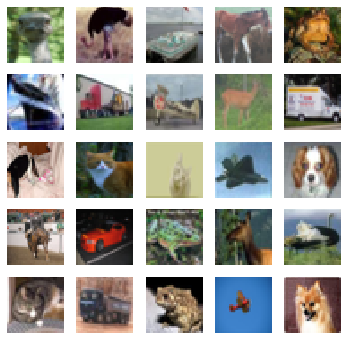

In [20]:
# Visualize CIFAR10 data
cifar_data,_=data_utils.load_CIFAR_batch('./data/cifar-10-batches-py/data_batch_1')

cifar_data = cifar_data.astype('uint8')
fig, axes1 = plt.subplots(5,5,figsize=(6,6))
for j in range(5):
    for k in range(5):
        i = np.random.choice(range(len(cifar_data)))
        axes1[j][k].set_axis_off()
        axes1[j][k].imshow(cifar_data[i])

In [21]:
cifar = data_utils.get_CIFAR10_data(subtract_mean=True)

X_train = cifar['X_train'].reshape([cifar['X_train'].shape[0],-1])
y_train = cifar['y_train']
X_val = cifar['X_val'].reshape([cifar['X_val'].shape[0],-1])
y_val = cifar['y_val']
X_test = cifar['X_test'].reshape([cifar['X_test'].shape[0],-1])
y_test = cifar['y_test']

X_train.shape, y_train.shape

((48000, 3072), (48000,))

In [22]:
cifar['X_train'].shape

(48000, 3, 32, 32)

In [23]:
X_train[6].shape

(3072,)

In [24]:
# Layers
def linear_forward(x, w, b):
    out = np.dot(x, w) + b
    cache = (x, w, b)
    return out, cache
  
def linear_backward(dout, cache):
    x, w, b = cache
    dx = np.dot(dout, w.T)
    dw = np.dot(x.T, dout)
    db = np.sum(dout, axis=0)
    return dx, dw, db
  
def ReLU_forward(x):
    output = x * (x > 0)
    cache = x
    return output, cache

def ReLU_backward(dout, cache):
    x = cache
    drelu = 1. * (x > 0)
    dx = drelu * dout 
    return dx

def softmax_entropy_loss(X, W, b, y):
    loss = 0.0
    dW = np.zeros_like(W)
    dX = np.zeros_like(X)
    db = np.zeros_like(b)

    z = X.dot(W) + b
    z -= np.matrix(np.max(z, axis=1)).T # for numerical stability

    N = z.shape[0]

    term1 = -z[np.arange(N), y]
    sum_exp_n = np.sum(np.exp(z), axis=1)
    term2 = np.log(sum_exp_n)
    loss = term1 + term2
    loss = np.sum(loss) / N
    
    softmax = np.exp(z)/sum_exp_n.reshape(-1,1)

    coef = np.exp(z) / sum_exp_n.reshape(-1,1)
    coef[np.arange(N),y] -= 1
    
    dW = X.T.dot(coef)
    dW /= N
    
    dX = coef.dot(W.T)
    dX /= N
    
    db = np.sum(coef, axis=0)
    db /= N

    return(loss, dX, dW, db, softmax)

np.random.seed(0)
x = 5 * np.random.randn(3, 2) + 12
w = np.random.randn(2,5)
b = np.random.randn(5)
dout = np.random.randn(3, 5)

out, cache = linear_forward(x,w,b)
dx, dw, db = linear_backward(dout, cache)

fx = lambda x: linear_forward(x, w, b)[0]
fw = lambda w: linear_forward(x, w, b)[0]
fb = lambda b: linear_forward(x, w, b)[0]

dx_num = gradient_check(fx, x, dout)
dw_num = gradient_check(fw, w, dout)
db_num = gradient_check(fb, b, dout)

print ('dx error: ', rel_error(dx_num, dx))
print ('dw error: ', rel_error(dw_num, dw))
print ('db error: ', rel_error(db_num, db))

dx error:  1.4114380472145635e-10
dw error:  5.555794306877853e-12
db error:  3.987454576543975e-11


In [25]:
# Create two hidden layers Neural Network 
# Forward: Use ReLU as activation functions
# Forward: Use Softmax entropy loss as the final layer 

def step(X, y, params, batch_size):
    # Create first hidden layer (both linear and relu)
    o_l1, c_l1 = linear_forward(X, params['w1'], params['b1'])
    o_r1, c_r1 = ReLU_forward(o_l1)
    
    # Create second hidden layer (both linear and relu)
    o_l2, c_l2 = linear_forward(o_r1, params['w2'], params['b2'])
    o_r2, c_r2 = ReLU_forward(o_l2)
    
    # Create last hidden layer with softmax entropy loss function
    cost, dout_x3, dout_w3, dout_b3, softmax = softmax_entropy_loss(o_r2, params['w3'], params['b3'], y)
    
    # Compute backward propagation for second hidden layer (both relu and linear)
    dout_r2 = ReLU_backward(dout_x3, c_r2)
    dout_x2, dout_w2, dout_b2 = linear_backward(dout_r2, c_l2)
    
    # Compute backward propagation for first hidden layer (both relu and linear)
    dout_r1 = ReLU_backward(dout_x2, c_r1)
    dout_x1, dout_w1, dout_b1 = linear_backward(dout_r1, c_l1)
        
    pred = softmax.argmax(axis=1)
    acc = np.sum(pred == y)/batch_size
        
    grads = {
        'w1': dout_w1,
        'b1': dout_b1,
        'w2': dout_w2,
        'b2': dout_b2,
        'w3': dout_w3,
        'b3': dout_b3, 
        }
    
    return(cost, acc, grads)

Iter[0|1000]: Prediction Accuracy: 0.105, Cost: 114.051
Iter[100|1000]: Prediction Accuracy: 0.300, Cost: 32.443
Iter[200|1000]: Prediction Accuracy: 0.330, Cost: 29.920
Iter[300|1000]: Prediction Accuracy: 0.415, Cost: 20.176
Iter[400|1000]: Prediction Accuracy: 0.390, Cost: 19.165
Iter[500|1000]: Prediction Accuracy: 0.365, Cost: 15.282
Iter[600|1000]: Prediction Accuracy: 0.410, Cost: 16.030
Iter[700|1000]: Prediction Accuracy: 0.470, Cost: 12.598
Iter[800|1000]: Prediction Accuracy: 0.465, Cost: 11.950
Iter[900|1000]: Prediction Accuracy: 0.465, Cost: 12.579


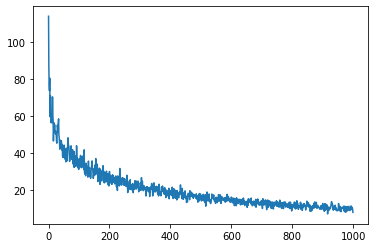

In [26]:
def Xavier_initialization(N_in, N_out):
    return np.random.randn(N_in, N_out).astype(np.float32) * np.sqrt(2.0/(N_in))

def weight_init(shape, random_state=None):
    if random_state:
        np.random.seed(random_state)
    params ={
        'w1': Xavier_initialization(shape[0],shape[1]),
        'b1': np.zeros(shape[1]),
        'w2': Xavier_initialization(shape[1],shape[2]),
        'b2': np.zeros(shape[2]),
        'w3': Xavier_initialization(shape[2],shape[3]),
        'b3': np.zeros(shape[3])
    }
    return params
    

shape = [3072, 3072, 1024, 10]
params = weight_init(shape, random_state=0)


def train_sgd(X,y,params,learning_rate=0.0001,num_iters=1000,batch_size=200):
    num_train = X.shape[0]
    params = params
    costs = []
    accs = []
    for it in range(num_iters):
        random_indices = np.random.choice(num_train, batch_size)
        X_batch = X[random_indices]
        y_batch = y[random_indices]
        
        cost, acc, grads = step(X_batch, y_batch, params, batch_size)
        
        # update parameters using SGD
        for p in params:
            params[p] += -learning_rate * grads[p]
        
        costs.append(cost)
        accs.append(acc)
        if (it % 100 == 0):
            print('Iter[%d|%d]: Prediction Accuracy: %.3f, Cost: %.3f'%(it,num_iters,acc, cost))

    return costs
        
        
sgd = train_sgd(X_train, y_train, params)
plt.plot(sgd)

Iter[0|1000]: Prediction Accuracy: 0.140, Loss: 121.482
Iter[100|1000]: Prediction Accuracy: 0.395, Loss: 6.260
Iter[200|1000]: Prediction Accuracy: 0.360, Loss: 2.946
Iter[300|1000]: Prediction Accuracy: 0.420, Loss: 2.189
Iter[400|1000]: Prediction Accuracy: 0.495, Loss: 1.862
Iter[500|1000]: Prediction Accuracy: 0.450, Loss: 1.735
Iter[600|1000]: Prediction Accuracy: 0.470, Loss: 1.716
Iter[700|1000]: Prediction Accuracy: 0.510, Loss: 1.387
Iter[800|1000]: Prediction Accuracy: 0.530, Loss: 1.428
Iter[900|1000]: Prediction Accuracy: 0.550, Loss: 1.371


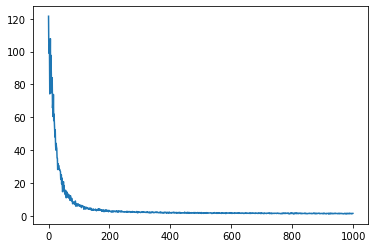

In [27]:
shape = [3072, 3072, 1024, 10]
params = weight_init(shape, random_state=0)


def train_sgd_momentum(X,y,params,learning_rate=0.0001,num_iters=1000,batch_size=200):
    num_train = X.shape[0]
    params = params
    costs = []
    accs = []
    
    #sgd_momentum initialization
    velocity = {k: np.zeros_like(v) for k, v in params.items()}
    rho = 0.9
    
    for it in range(num_iters):
        random_indices = np.random.choice(num_train, batch_size)
        X_batch = X[random_indices]
        y_batch = y[random_indices]
        
        cost, acc, grads = step(X_batch, y_batch, params, batch_size)
        
        # update parameters using SGD+Momentum
        for p in params:
            velocity[p] = rho*velocity[p]+grads[p]
            params[p] += -learning_rate*velocity[p]
        
        costs.append(cost)
        accs.append(acc)
        if (it % 100 == 0):
            print('Iter[%d|%d]: Prediction Accuracy: %.3f, Loss: %.3f'%(it,num_iters,acc, cost))

    return costs
        
        
sgd_m = train_sgd_momentum(X_train, y_train, params)
plt.plot(sgd_m)

Iter[0|1000]: Prediction Accuracy: 0.130, Loss: 113.869
Iter[100|1000]: Prediction Accuracy: 0.435, Loss: 23.540
Iter[200|1000]: Prediction Accuracy: 0.525, Loss: 12.529
Iter[300|1000]: Prediction Accuracy: 0.470, Loss: 9.143
Iter[400|1000]: Prediction Accuracy: 0.485, Loss: 6.568
Iter[500|1000]: Prediction Accuracy: 0.435, Loss: 5.339
Iter[600|1000]: Prediction Accuracy: 0.545, Loss: 2.718
Iter[700|1000]: Prediction Accuracy: 0.490, Loss: 2.252
Iter[800|1000]: Prediction Accuracy: 0.575, Loss: 1.770
Iter[900|1000]: Prediction Accuracy: 0.510, Loss: 1.665


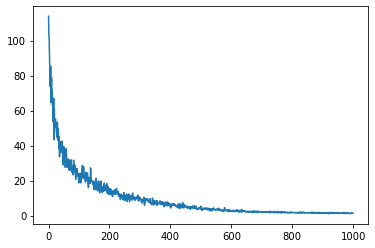

In [28]:
shape = [3072, 3072, 1024, 10]
params = weight_init(shape, random_state=0)

def train_adam(X,y,params,learning_rate=0.0001,num_iters=1000,batch_size=200):
    num_train = X.shape[0]
    params = params
    costs = []
    accs = []
    
    # adam initialization  
    first_moment = {k: np.zeros_like(v) for k, v in params.items()}
    second_moment = {k: np.zeros_like(v) for k, v in params.items()}
    beta1 = 0.9
    beta2 = 0.999
    epsilon = 1e-8
    for it in range(num_iters):
        random_indices = np.random.choice(num_train, batch_size)
        X_batch = X[random_indices]
        y_batch = y[random_indices]
        
        cost, acc, grads = step(X_batch, y_batch, params, batch_size)
        
        # update parameters using Adam
        for p in params:
            first_moment[p] = beta1 * first_moment[p] + (1 - beta1) * grads[p]
            second_moment[p] = beta2 * second_moment[p] + (1 - beta2) * grads[p]**2
            first_unbias_p = first_moment[p]/(1-beta1**(it+1))
            second_unbias_p = second_moment[p]/(1-beta2**(it+1))
            params[p] += -(learning_rate*first_unbias_p)/(np.sqrt(second_unbias_p)+epsilon)
        
        costs.append(cost)
        accs.append(acc)
        if (it % 100 == 0):
            print('Iter[%d|%d]: Prediction Accuracy: %.3f, Loss: %.3f'%(it,num_iters,acc, cost))

    return costs
        
        
adam = train_adam(X_train, y_train, params)
plt.plot(adam)

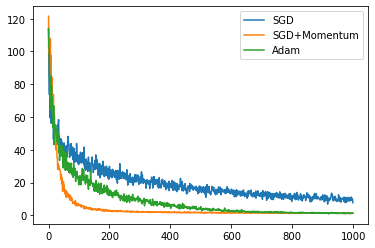

In [29]:
plt.plot(sgd)
plt.plot(sgd_m)
plt.plot(adam)

plt.legend(['SGD', 'SGD+Momentum','Adam'], loc='upper right')
plt.show()

Click here to go back [Table of Content](#Table_of_Content).

# References

- Ioffe, S., & Szegedy, C. (2015). Batch normalization: Accelerating deep network training by reducing internal covariate shift. arXiv preprint arXiv:1502.03167.
- http://cs231n.stanford.edu/
- https://www.quora.com/What-does-an-x-axis-represent-in-a-logistic-regression-sigmoid-function
- http://mathworld.wolfram.com/HyperbolicTangent.html
- https://ml4a.github.io/ml4a/neural_networks/
- https://towardsdatascience.com/activation-functions-in-neural-networks-58115cda9c96
- https://mlxai.github.io/2017/01/09/implementing-softmax-classifier-with-vectorized-operations.html
- https://kevinzakka.github.io/2016/09/14/batch_normalization/
- https://kratzert.github.io/2016/02/12/understanding-the-gradient-flow-through-the-batch-normalization-layer.html
- http://andyljones.tumblr.com/post/110998971763/an-explanation-of-xavier-initialization
